In [14]:
import matplotlib.pyplot as plt
import csv
import numpy as np

plt.rcParams["figure.figsize"] = (8,6)

In [15]:
def average_cct(name, algo):
    cct = []
    for i in range (1,51):
        with open(f"times/{name}/{name}_{i}{algo}_cct.csv", "r") as content:
            csvreader = csv.reader(content)
            for row in csvreader:
                cct.append(row)
    average = []
    for i in range (50):
        sum = 0
        for j in range (len(cct[i])):
            sum += float(cct[i][j])
        average.append(sum/len(cct[i]))
    return average

op = average_cct("Rachid", "_op")
sinc = average_cct("Rachid", "_sinc")
elite = average_cct("Rachid", "_elite")

gain = []
for i in range (len(op)):
    gain.append((sinc[i]-op[i])/sinc[i]*100)


In [16]:
def colorize_plot(p):
    p[0].set_color("green")
    p[1].set_color("red")
    p[2].set_color("green")
    p[3].set_color("red")
    p[4].set_color("green")
    p[5].set_color("red")

In [17]:
algos = [sinc, op, elite]
names = ["Global", "Global ", "10th perc.", "10th perc. ", "90th perc.", "90th perc. "]

Text(0, 0.5, 'Gain in percentage compared to TCP')

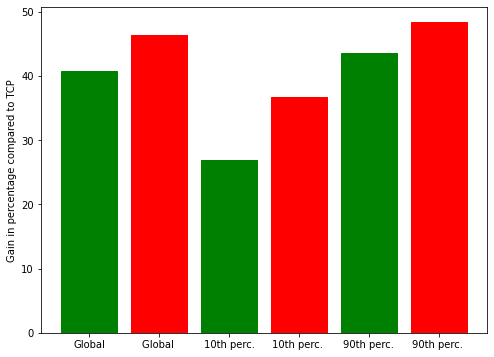

In [18]:
average_data = [np.mean(algo_results) for algo_results in algos]
percentile_10 = [np.percentile(algo_results, 10) for algo_results in algos]
percentile_90 = [np.percentile(algo_results, 90) for algo_results in algos]
gain = []
for i in [average_data, percentile_10, percentile_90]:
    gain.append(-(i[0]-i[2])/i[2]*100)
    gain.append(-(i[1]-i[2])/i[2]*100)

colorize_plot(plt.bar(names, gain))
plt.ylabel("Gain in percentage compared to TCP")

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (3,).

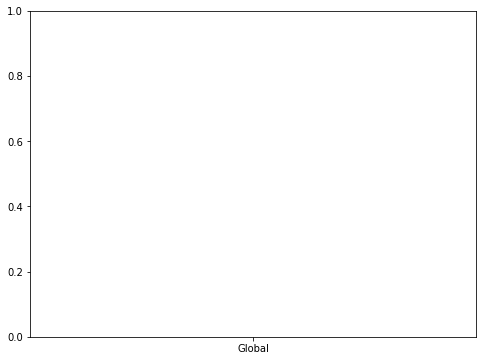

In [19]:
percentile_data = [np.percentile(algo_results, 10) for algo_results in algos]
colorize_plot(plt.bar(names, percentile_data, width=0.5))
plt.title("10th percentile")
plt.ylabel("Average CCT in seconds over 50 instances")

Text(0, 0.5, 'Average CCT in seconds over 50 instances')

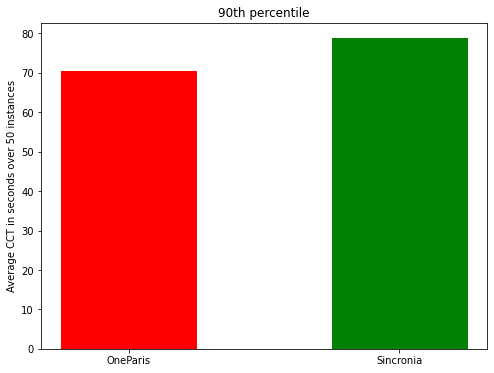

In [ ]:
percentile_data = [np.percentile(algo_results, 90) for algo_results in algos]
colorize_plot(plt.bar(names, percentile_data, width=0.5))
plt.title("90th percentile")
plt.ylabel("Average CCT in seconds over 50 instances")

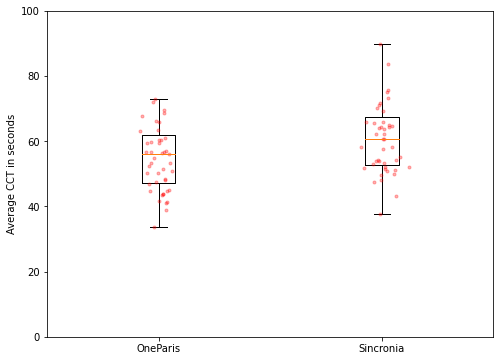

In [ ]:
plt.boxplot(algos, labels=names)
for i in range(len(algos)):
    y = algos[i]
    x = np.random.normal(i + 1, 0.04, size=len(y))
    plt.ylim(0, 100)
    plt.plot(x, y, 'r.', alpha=0.3)
    plt.ylabel("Average CCT in seconds")

Text(0, 0.5, 'Gain in percentage compared to Sincronia')

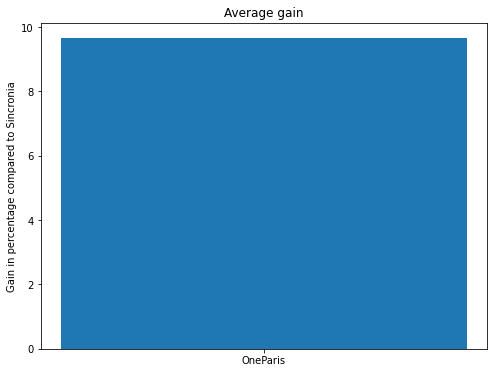

In [ ]:
average_data = [np.mean(gain)]

cct_plot = plt.bar("OneParis", average_data, width=0.5)
plt.title("Average gain")
plt.ylabel("Gain in percentage compared to Sincronia")

Text(0, 0.5, 'Gain in percentage compared to Sincronia')

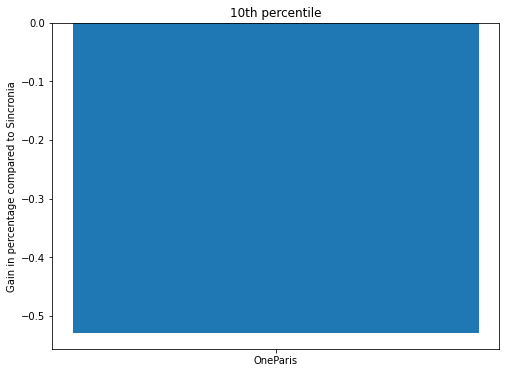

In [ ]:
percentile_data = [np.percentile(gain, 10)]
plt.bar("OneParis", percentile_data, width=0.5)
plt.title("10th percentile")
plt.ylabel("Gain in percentage compared to Sincronia")